Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges

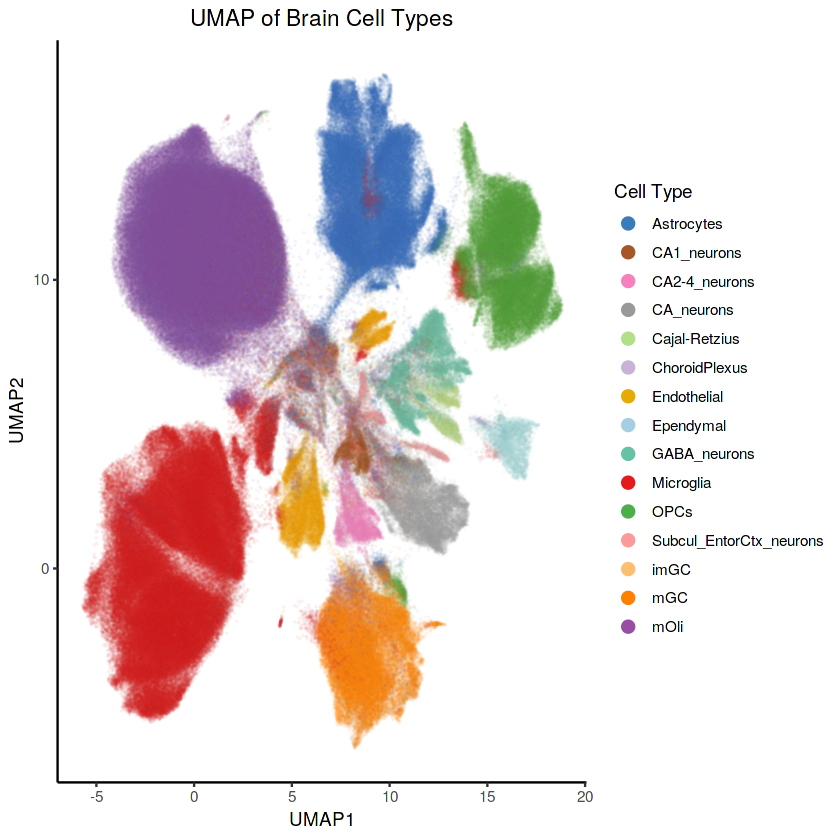

In [1]:
##############################################
## SCRIPT 1: Read, annotate, and plot UMAP  ##
##############################################

# 1) Load libraries
library(SingleCellExperiment)
library(Seurat)
library(dplyr)
library(ggplot2)

# 2) Read in your merged object
tmp <- readRDS("/data/epilep/merged.rds")

# 3) Extract UMAP coordinates from scVI
umap_coords <- reducedDim(tmp, "X_scvi-global_umap")

# 4) Build plotting data frame
plot_df <- data.frame(
  UMAP1    = umap_coords[, 1],
  UMAP2    = umap_coords[, 2],
  CellType = tmp$celltypist.Human_AdultAged_Hippocampus
)

# 5) Define your color palette
celltype_colors <- c(
  "Microglia"                    = "#E41A1C",
  "Astrocytes"                   = "#377EB8",
  "OPCs"                         = "#4DAF4A",
  "mOli"                         = "#984EA3",
  "mGC"                          = "#FF7F00",
  "CA1_neurons"                  = "#A65628",
  "CA2-4_neurons"                = "#F781BF",
  "CA_neurons"                   = "#999999",
  "GABA_neurons"                 = "#66C2A5",
  "Endothelial"                  = "#E6AB02",
  "Ependymal"                    = "#A6CEE3",
  "Cajal-Retzius"                = "#B2DF8A",
  "Subcul_EntorCtx_neurons"      = "#FB9A99",
  "imGC"                         = "#FDBF6F",
  "ChoroidPlexus"                = "#CAB2D6"
)

# 6) Plot UMAP with legend only
p <- ggplot(plot_df, aes(x = UMAP1, y = UMAP2, color = CellType)) +
  geom_point(size = 0.03, alpha = 0.04) +
  theme_classic() +
  scale_color_manual(values = celltype_colors) +
  labs(title = "UMAP of Brain Cell Types", color = "Cell Type") +
  theme(
    legend.position = "right",
    plot.title      = element_text(hjust = 0.5)
  ) +
  guides(color = guide_legend(override.aes = list(alpha = 1, size = 3)))

# 7) Display
print(p)

In [35]:
assayNames(tmp)
reducedDimNames(tmp)
colnames(colData(tmp))
head(rownames(tmp), 10)

[1] "X"       "ambient" "counts"

[1] "X_scvi"              "X_scvi-global_umap"  "X_scvi-unknown_umap"

[1] "label"                                      
 [2] "n_counts"                                   
 [3] "n_genes"                                    
 [4] "celltypist.Human_AdultAged_Hippocampus.conf"
 [5] "batch"                                      
 [6] "total_counts_mt"                            
 [7] "sample_original"                            
 [8] "total_counts"                               
 [9] "celltypist.Human_AdultAged_Hippocampus"     
[10] "n_genes_by_counts"                          
[11] "pct_counts_mt"                              
[12] "sample"                                     
[13] "scvi.global.0.5_leiden"                     
[14] "scvi.unknown.0.5_leiden"                    
[15] "scvi.global.1.0_leiden"                     
[16] "scvi.unknown.1.0_leiden"

[1] "A1BG"      "A1BG-AS1"  "A1CF"      "A2M"       "A2M-AS1"   "A2ML1"    
 [7] "A2ML1-AS1" "A2ML1-AS2" "A2MP1"     "A3GALT2"

In [43]:
assayNames(tmp)

[1] "X"       "ambient" "counts"

In [4]:
# Load necessary packages
library(Seurat)
library(SingleCellExperiment)

# Load your data
tmp <- readRDS("/data/epilep/merged.rds")

# Check your assay names to confirm the main assay:
assayNames(tmp)  # You should see something like "X" or "counts"


Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.0 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
   

[1] "X"       "ambient" "counts"

In [5]:
# Using "X" assay for counts and data
seurat_obj <- CreateSeuratObject(counts = assay(tmp, "X"))
seurat_obj <- AddMetaData(seurat_obj, metadata = as.data.frame(colData(tmp)))


In [6]:
# Specifically add CellType clearly
seurat_obj$CellType <- colData(tmp)$celltypist.Human_AdultAged_Hippocampus

# Attach UMAP coordinates manually
umap_coords <- reducedDim(tmp, "X_scvi-global_umap")

# Set UMAP embedding inside Seurat object
seurat_obj[["umap"]] <- CreateDimReducObject(embeddings = umap_coords, key = "UMAP_", assay = DefaultAssay(seurat_obj))

# Normalize the data first (standard Seurat step)
seurat_obj <- NormalizeData(seurat_obj)


Warning message:
“No columnames present in cell embeddings, setting to 'UMAP_1:2'”
Normalizing layer: counts



In [7]:
library(ggplot2)
library(ggrepel)
library(dplyr)


In [15]:
# Expanded marker gene list (yours + previous)
marker_genes <- c(
  # Microglia
  "CX3CR1", "IBA1", "P2RY12", "TMEM119", "ITGAM", "CSF1R", "HEXB", "SIGLEC11", "SALL1", "TLR2", "TLR4", "CD68", "CD45", "TREM2", "CCL4", "CCL3", "CTSS", "TYROBP", "CD83",
  # Astrocytes
  "GFAP", "ALDH1L1", "S100B", "AQP4", "SOX9", "CPE", "CLU", "ALDOC", "SLC1A3", "SLC1A2",
  # Oligodendrocytes
  "MOG", "MBP", "CNP", "PLP1", "MAG", "MAL", "CRYAB",
  # Neurons (general)
  "MAP2", "NEUN", "SYN1", "GAP43", "TUBB3",
  # Endothelial Cells
  "PECAM1", "VWF", "CD34", "CDH5", "CLDN5", "ITM2A", "BSG", "RSG5", "APOLD1",
  # OPCs
  "PDGFRA", "NG2", "SOX10", "OLIG2", "NKX2-2", "CNTN1", "TNR",
  # GABAergic Neurons
  "GAD1", "GAD2", "VGAT",
  # Glutamatergic Neurons
  "VGLUT1", "SLC17A7", "CAMK2A", "VGLUT2",
  # Cajal-Retzius Cells
  "RELN", "CALB2", "TP73",
  # Choroid Plexus
  "TTR", "AQP1", "OTX2"
)
# Keep only those present in your dataset
marker_genes <- marker_genes[marker_genes %in% rownames(seurat_obj)]

In [19]:
DefaultAssay(seurat_obj) <- "RNA"  # Usually named RNA
seurat_obj <- NormalizeData(seurat_obj, verbose = TRUE)

Normalizing layer: counts



: 

: 

: 

In [18]:
seurat_obj <- ScaleData(seurat_obj, features = rownames(seurat_obj))

Warning message:
“No layers found matching search pattern provided”


ERROR: [1m[33mError[39m in `ScaleData()`:[22m
[33m![39m No layer matching pattern 'data' found. Please run NormalizeData and retry
